In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df= pd.read_csv("Customer Churn.csv")

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing  banks with 0 as tenure is 0 and no total charges are recorded


In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
 df.isnull().sum().sum()

np.int64(0)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,totalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2279.734304
std,0.368612,24.559481,30.090047,2266.794470,2266.794470
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000,8684.800000


In [24]:
df['customerID'].duplicated().sum()

np.int64(0)

# converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [28]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return"no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv) 

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,totalCharges
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


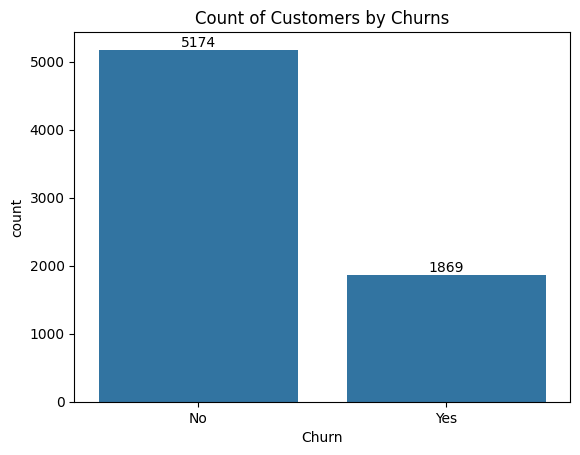

In [47]:
ax = sns.countplot(x = df['Churn'] , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churns")
plt.show()

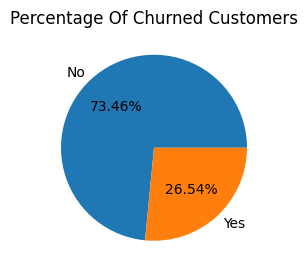

In [49]:
plt.figure(figsize =( 3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'],labels= gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customers")
plt.show()

## From the given pie chart we can conlude that 26.54% of out Customers have churned out.
## now Lets Explore The reason Behind it

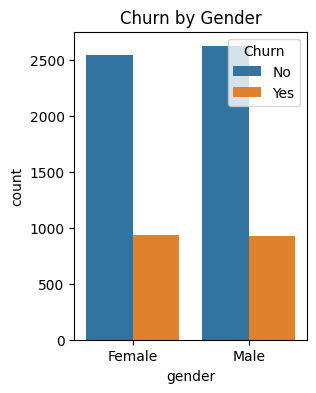

In [58]:
plt.figure(figsize = (3,4))
sns.countplot(x ='gender', data = df, hue = 'Churn')
plt.title("Churn by Gender")
plt.show()

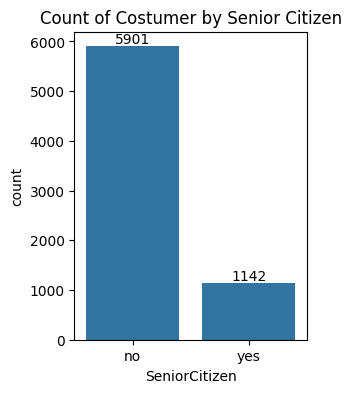

In [68]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Costumer by Senior Citizen")
plt.show()

# #comparative a greater percentage of people in senior citizen catagory have churned

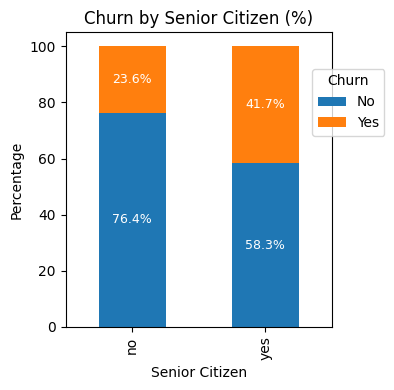

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Aggregate counts
count_df = (
    df.groupby(['SeniorCitizen', 'Churn'])
      .size()
      .unstack()
)

# 2. Convert counts to percentages (row-wise)
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))

percent_df.plot(
    kind='bar',
    stacked=True,
    ax=ax,   
)

ax.set_title("Churn by Senior Citizen (%)")
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage")
ax.legend(title="Churn", bbox_to_anchor = (0.9,0.9))

# 4. Add percentage labels inside bars
for i, row in enumerate(percent_df.values):
    cumulative = 0
    for value in row:
        ax.text(
            i,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha='center',
            va='center',
            fontsize=9,
            color='white'
        )
        cumulative += value

plt.tight_layout()
plt.show()


# #people who have used our services for a long time have stayed and people who have used our services for one or two months have churned

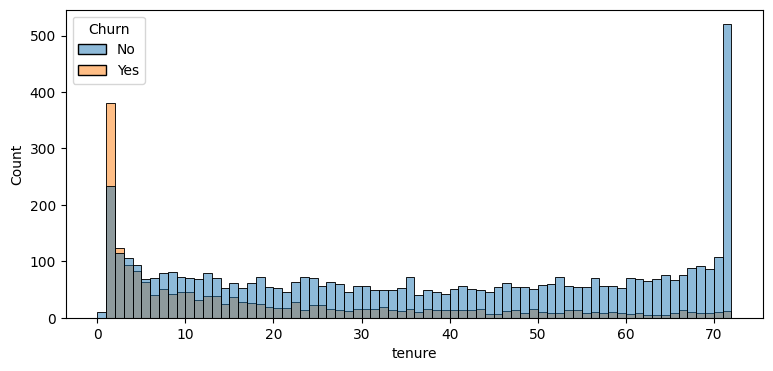

In [77]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

# #people who have month to month contract are more likly to churn compared to other as shown below

Text(0.5, 1.0, 'Count of Customers on Contract Duration basis')

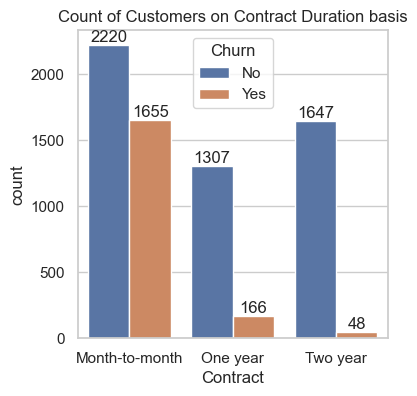

In [104]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract" , data= df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers on Contract Duration basis")

In [86]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'totalCharges'], dtype=object)

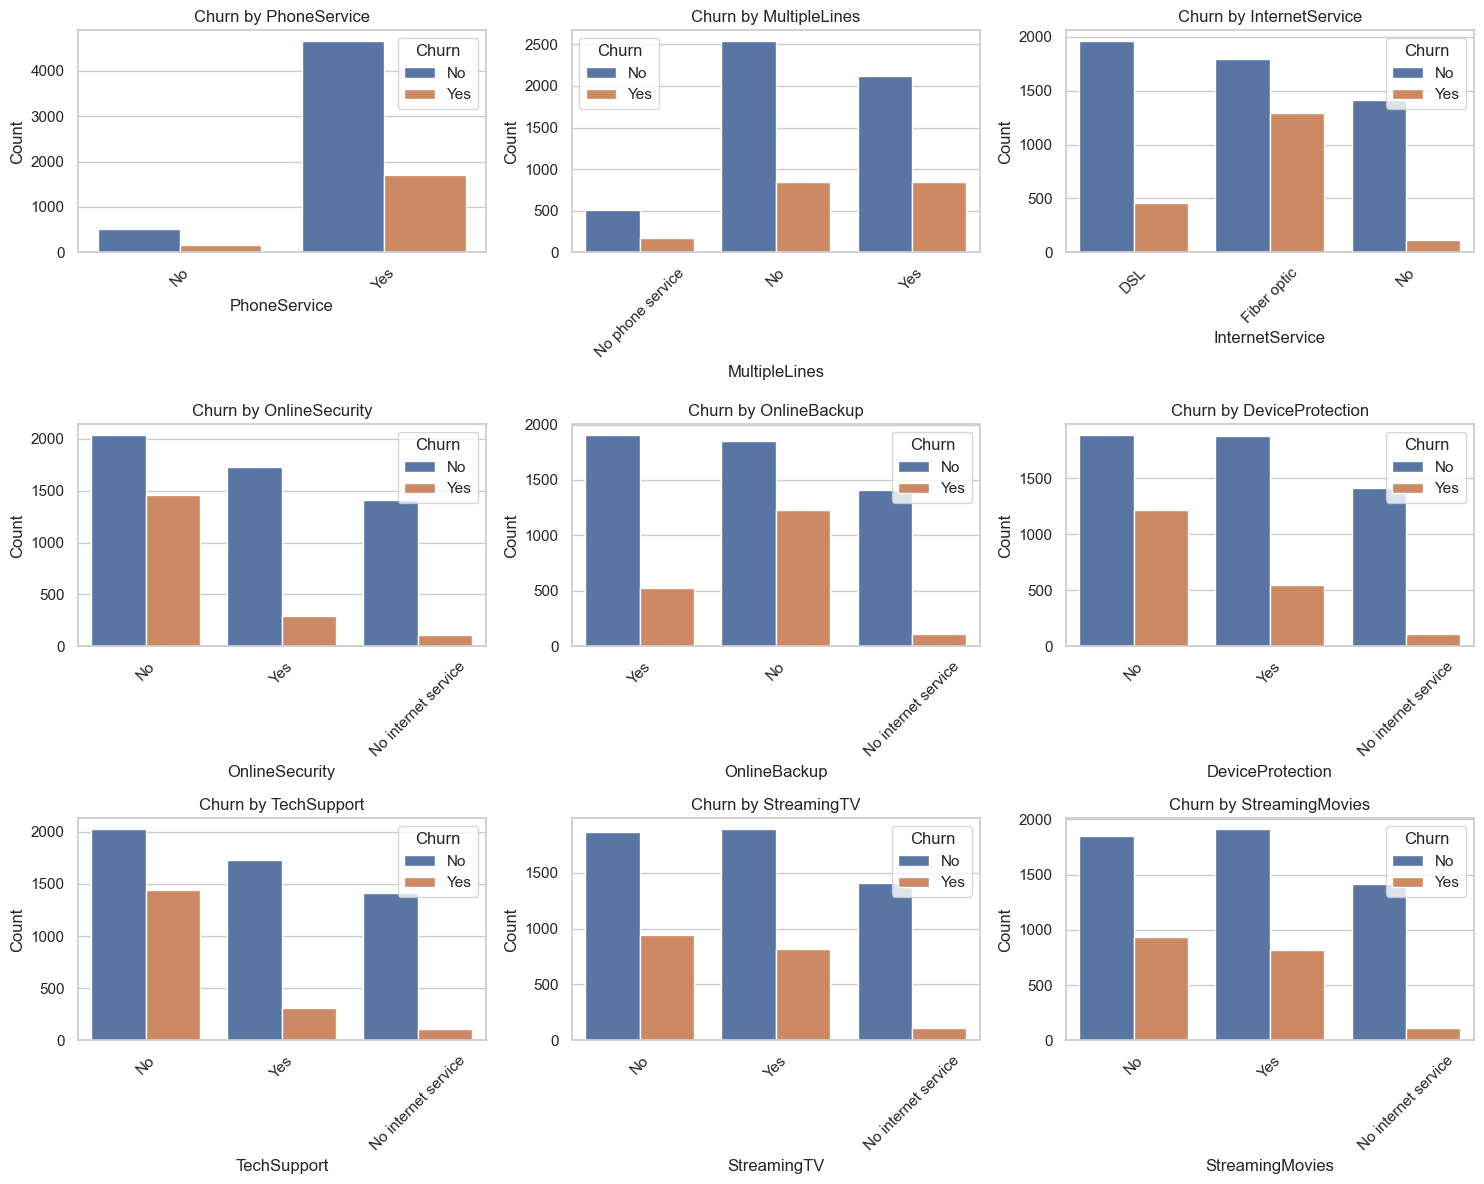

In [88]:


# Columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop through columns and axes
for i, col in enumerate(columns):
    sns.countplot(data=df,x=col,hue='Churn',ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#Customers without InternetService have the lowest churn rates across all service categories.

#Among internet users, customers not subscribed to OnlineSecurity, TechSupport, or DeviceProtection show significantly higher churn.

#Fiber optic users churn more frequently than DSL users, indicating a higher-risk segment.

#StreamingTV and StreamingMovies have a weaker impact on churn compared to security and support-related services.

# Finding out trends on basis of Payment methord

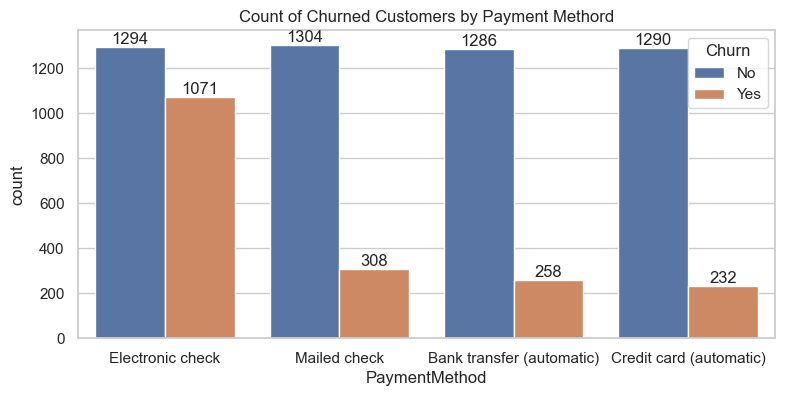

In [103]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customers by Payment Methord")
plt.show()

#customer is likely to churn when he is using electronic check as a payment menthod